In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy

In [4]:
import os
# from modules import RotoTranslation
# from modules import DataConstructor
import sys
filepath = os.getcwd()

from PIL import Image
im = Image.open(os.path.join(filepath,'img/t1763.tif'))
# im.show()


In [19]:

#include static method of rotating an image
class RotoTranslation:
    def __init__(self, translate, rotate):
        self.rotate = rotate
        self.translate = translate
        
        cr = np.cos(self.rotate)
        sr = np.sin(self.rotate)

        self.mapping = np.array([[cr, sr], [-sr, cr]])


    def rototranslate(self, input):
        # if isinstance(image, np.array):
        #     input = image.numpy()

        dx, dy = self.translate
        
        shape = input.shape
        center = np.array(shape[:2]) / 2

        d = center - np.dot(self.mapping, center) - np.array([dy, dx])
        print(self.mapping)

        new_image = scipy.ndimage.affine_transform(
                input=input,
                matrix=self.mapping,
                offset=d
            )
        return new_image
    
    def inverse(self, image):

        # if isinstance(image) == torch.tensor:
        #     input = image.numpy()

        dx, dy = self.translate
        
        shape = image.shape
        center = np.array(shape[:2]) / 2

        inverse_mapping = np.linalg.inv(self.mapping)
        print(inverse_mapping)

        d = center + np.dot(inverse_mapping, center) + np.array([dy, dx])


        new_image = scipy.ndimage.affine_transform(
                input=image,
                matrix=inverse_mapping,
                offset=d
            )
        return new_image



In [21]:
x = np.array(im)
rototranslation_inst = RotoTranslation((2,3), 0.78)
y = rototranslation_inst.rototranslate(x)
y = rototranslation_inst.inverse(y)


[[ 0.71091354  0.70327942]
 [-0.70327942  0.71091354]]
[[ 0.71091354 -0.70327942]
 [ 0.70327942  0.71091354]]


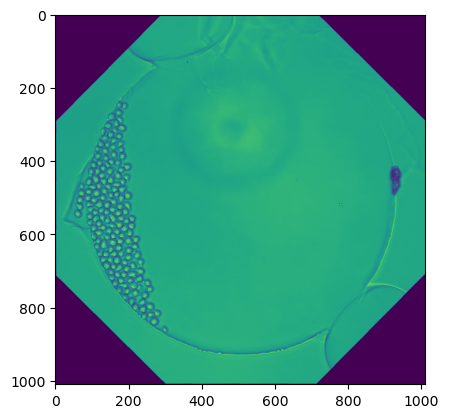

In [22]:
import matplotlib.pyplot as plt
plt.imshow(y)

In [ ]:
#What I want to create
batch = DataConstructor(image, rotate, translate)
def train():
    for i in range(epochs):
        batch = 
        loss = criterion(batch, orig)
        loss.backward()

In [40]:


#https://jimmy-ai.tistory.com/98

def input_map(N, M):
    i = np.arange(0, M)
    i = torch.from_numpy(np.tile(i, N).reshape(N,M))

    j = np.arange(0, N)
    j = torch.from_numpy(np.repeat(j[:, np.newaxis], repeats=M, axis=1))
    ##Q: should this get any gradient??

    return i, j

#input needs to be (C, H, W) --> can't be (N, C, H, W) at the moment
def output(nn_output, N, M):
    i, j = input_map(N, M)
    xy = torch.zeros(3, N, M)
    assert xy.shape[0] is nn_output.shape[0]
    assert xy.shape[1] is nn_output.shape[1]
    assert xy.shape[2] is nn_output.shape[2]

    xy[0,:] = nn_output[0, :] + 2*i
    xy[0,:] = nn_output[0, :] - N
    xy[1,:] = nn_output[1, :] + 2*j
    xy[1,:] = nn_output[1, :] - M
    w = F.sigmoid(nn_output[2,:])

    return xy, w

#input: (N, C, H, W) / output: (N, )
# [ [x1,y1], [x2, y2], [x3, y3], .....[xN, yN] ]
# 
#
def posAndWeights(eps = 0.01, N, M):
    


In [ ]:
class Model(nn.Module):
    def __init__(self, N, M):
        self.N = N
        self.M = M
        self.conv_1 = nn.Sequential(nn.Conv2d(3, ), nn.Conv2d, nn.ReLU()) #input image
        self.max_pool_1 = None
        self.conv_2 = None
        self.max_pool_2 = None
        self.conv_3 = None
    
    def forward(self, x):
        x = self.conv_1(x)
        x  = self.max_pool_1(x)
        x = self.conv_2(x)
        x = self.max_pool_2(x)
        x = self.conv_3(x)
        (x,y), weights = pos_and_weights(self.N, self.M, ) #The input is (batch_size, channels, height, width)
        return (x,y), weights


In [41]:
nn_output = torch.rand(3, 4, 6) #output should be (2,3)
print(nn_output)
# print(nn_output[0, :])
xy, w = output(nn_output, int(nn_output.shape[1]), int(nn_output.shape[2]))
print(xy)
print(w)

tensor([[[0.4753, 0.0548, 0.6200, 0.0243, 0.5789, 0.7113],
         [0.6189, 0.2085, 0.2705, 0.8380, 0.7591, 0.3516],
         [0.3912, 0.3805, 0.1555, 0.0531, 0.0227, 0.1696],
         [0.6540, 0.8013, 0.6490, 0.8602, 0.2465, 0.6651]],

        [[0.1847, 0.3212, 0.3944, 0.0022, 0.2355, 0.3758],
         [0.3667, 0.6992, 0.9157, 0.9147, 0.4202, 0.8809],
         [0.6387, 0.5754, 0.2675, 0.1856, 0.0536, 0.5171],
         [0.5829, 0.9551, 0.9153, 0.6102, 0.4462, 0.6721]],

        [[0.0862, 0.7570, 0.2323, 0.7459, 0.8178, 0.3280],
         [0.9236, 0.6708, 0.4433, 0.3025, 0.6677, 0.0623],
         [0.2492, 0.6073, 0.6662, 0.9061, 0.9886, 0.6675],
         [0.1777, 0.2260, 0.3555, 0.2008, 0.0625, 0.4941]]])
tensor([[[-3.5247, -3.9452, -3.3800, -3.9757, -3.4211, -3.2887],
         [-3.3811, -3.7915, -3.7295, -3.1620, -3.2409, -3.6484],
         [-3.6088, -3.6195, -3.8445, -3.9469, -3.9773, -3.8304],
         [-3.3460, -3.1987, -3.3510, -3.1398, -3.7535, -3.3349]],

        [[-5.8153, -5.67

In [30]:
i, j = input_map(6,7)
print("i: ", i)
print("*************")
print("j: ", j)

i:  tensor([[0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6]])
*************
j:  tensor([[0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5]])


In [2]:
xy = torch.rand(3, 4,4)
print(xy)

tensor([[[8.6771e-01, 7.9029e-01, 7.8641e-01, 3.8833e-01],
         [4.6045e-01, 5.1525e-02, 9.0832e-01, 6.8435e-01],
         [1.6388e-01, 6.5436e-01, 1.4983e-01, 9.8420e-01],
         [7.4212e-01, 3.1308e-02, 6.7640e-01, 4.4585e-01]],

        [[9.8540e-01, 1.7157e-02, 7.1339e-01, 8.5872e-01],
         [1.4750e-01, 2.6105e-01, 6.1658e-01, 7.6477e-01],
         [4.1442e-01, 9.7600e-01, 9.1025e-01, 1.2070e-01],
         [6.2598e-01, 5.5999e-01, 1.2705e-01, 2.4614e-01]],

        [[9.7193e-01, 8.1117e-01, 7.6475e-02, 3.7051e-01],
         [1.9073e-01, 9.5463e-04, 8.6409e-01, 3.6654e-01],
         [9.2579e-01, 9.0983e-01, 8.9691e-01, 3.6096e-01],
         [7.8492e-01, 7.7396e-01, 4.3907e-01, 6.9854e-01]]])
